In [1]:
# This is a Python 3 script

In [2]:
%matplotlib inline
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const

LS = const.L_sun.cgs.value
pc = const.pc.cgs.value

In [3]:
filename = '/Volumes/SD-Mac/CDF_archive/CDF_archive_spire_1d_lines.txt'

In [4]:
data = ascii.read(filename)

In [5]:
print(set(data['Object']))

{'IRAS03245', 'WL12', 'GSS30', 'RCrA-IRS7B', 'L1014', 'L1551-IRS5', 'B1-a', 'L1455-IRS', 'TMC1', 'TMC1A', 'HH46', 'TMR1', 'RCrA-IRS7C', 'BHR71', 'L723-MM', 'B335', 'L1157', 'RCrA-IRS5A', 'IRAS03301', 'B1-c', 'VLA1623', 'L483', 'DKCha', 'RNO91', 'IRAS15398', 'Ced110'}


In [6]:
# Enter the line name 
linename = 'o-H2O1_10-1_01'

In [7]:
# only for 1-D spectra fitting results
selecter = (data['Line'] == linename) & (data['SNR'] >= 3.0) & (data['Validity'] == 1)
print('Number of detections: ', len(data[selecter]))
print('Sources with detections: ', data[selecter]['Object'])

Number of detections:  3
Sources with detections:    Object 
---------
     B1-c
    BHR71
IRAS15398


## Correlation plot

In [13]:
xname = 'o-H2O1_10-1_01'
yname = 'p-H2O1_11-0_00'
xlabel = r'$\rm{o-H_{2}O\,1_{10}-1_{01}\,\,Luminosity\,[L_{\odot}]}$'
ylabel = r'$\rm{p-H_{2}O\,1_{11}-0_{00}\,\,Luminosity\,[L_{\odot}]}$'

In [24]:
xname = 'CO6-5'
yname = 'CO4-3'
xlabel = r'$\rm{CO}\,\it{J}=6\rightarrow5\rm{\,\,Luminosity\,[L_{\odot}]}$'
ylabel = r'$\rm{CO}\,\it{J}=4\rightarrow3\rm{\,\,Luminosity\,[L_{\odot}]}$'

In [21]:
xname = 'CO6-5'
yname = 'CO12-11'
xlabel = r'$\rm{CO}\,\it{J}=6\rightarrow5\rm{\,\,Luminosity\,[L_{\odot}]}$'
ylabel = r'$\rm{CO}\,\it{J}=12\rightarrow11\rm{\,\,Luminosity\,[L_{\odot}]}$'

Distance of sources

color code for sources

In [18]:
dist = {'L1014': 200, 'TMR1': 140, 'RCrA-IRS5A': 130, 'TMC1A': 140, 'IRAS03301': 250,
        'IRAS03245': 250, 'HH46': 450, 'TMC1': 140, 'L1551-IRS5': 140, 'IRAS15398': 130,
        'L723-MM': 300, 'WL12': 125, 'RNO91': 125, 'DKCha': 178, 'L483': 200,
        'L1455-IRS': 250, 'Ced110': 125, 'GSS30': 125, 'L1157': 325, 'RCrA-IRS7B': 130,
        'B335': 106, 'BHR71': 200, 'RCrA-IRS7C': 130, 'B1-a': 250, 'VLA1623': 125,
        'B1-c': 250}
# Class 0: blue; Class I: red; Class II: black
color_code = {'L1014': 'k', 'TMR1': 'r', 'RCrA-IRS5A': 'r', 'TMC1A': 'r', 'IRAS03301': 'k',
              'IRAS03245': 'b', 'HH46': 'r', 'TMC1': 'r', 'L1551-IRS5': 'r', 'IRAS15398': 'b',
              'L723-MM': 'b', 'WL12': 'r', 'RNO91': 'r', 'DKCha': 'k', 'L483': 'b',
              'L1455-IRS': 'r', 'Ced110': 'b', 'GSS30': 'r', 'L1157': 'b', 'RCrA-IRS7B': 'b',
              'B335': 'b', 'BHR71': 'b', 'RCrA-IRS7C': 'r', 'B1-a': 'r', 'VLA1623': 'b',
              'B1-c': 'b'}

In [25]:
xdata = np.empty(len(data['Object']))
ydata = np.empty(len(data['Object']))

# need to convert from W/cm2 to L_sun
xdata_selecter = (data['Line'] == xname)
xdetection_mask = xdata_selecter & (data['SNR'] >= 3) & (data['Validity'] == 1)
xnondetection_mask = xdata_selecter & (data['SNR'] < 3)

xdata[xdetection_mask] = data['Str(W/cm2)'][xdetection_mask]*data['FWHM(um)'][xdetection_mask]*\
        4*np.pi*(np.array([dist[obj] for obj in data['Object'][xdetection_mask]])*pc)**2*1e7/LS
xdata[xnondetection_mask] = data['Noise(W/cm2/um)'][xnondetection_mask]*\
        4*np.pi*(np.array([dist[obj] for obj in data['Object'][xnondetection_mask]])*pc)**2*1e7/LS

ydata_selecter = (data['Line'] == yname)
ydetection_mask = ydata_selecter & (data['SNR'] >= 3) & (data['Validity'] == 1)
ynondetection_mask = ydata_selecter & (data['SNR'] < 3)

ydata[ydetection_mask] = data['Str(W/cm2)'][ydetection_mask]*data['FWHM(um)'][ydetection_mask]*\
        4*np.pi*(np.array([dist[obj] for obj in data['Object'][ydetection_mask]])*pc)**2*1e7/LS
ydata[ynondetection_mask] = data['Noise(W/cm2/um)'][ynondetection_mask]*\
        4*np.pi*(np.array([dist[obj] for obj in data['Object'][ynondetection_mask]])*pc)**2*1e7/LS
    

# common detection indice
xind = np.nonzero(np.in1d(data['Object'][xdetection_mask], data['Object'][ydetection_mask]))[0]
yind = np.nonzero(np.in1d(data['Object'][ydetection_mask], data['Object'][xdetection_mask]))[0]

# only upper limit in x
xuplimx = np.nonzero(np.in1d(data['Object'][xnondetection_mask], data['Object'][ydetection_mask]))[0]
yuplimx = np.nonzero(np.in1d(data['Object'][ydetection_mask], data['Object'][xnondetection_mask]))[0]

# only upper limit in y
xuplimy = np.nonzero(np.in1d(data['Object'][xdetection_mask], data['Object'][ynondetection_mask]))[0]
yuplimy = np.nonzero(np.in1d(data['Object'][ynondetection_mask], data['Object'][xdetection_mask]))[0]

# upper limits in both x and y
xuplim = np.nonzero(np.in1d(data['Object'][xnondetection_mask], data['Object'][ynondetection_mask]))[0]
yuplim = np.nonzero(np.in1d(data['Object'][ynondetection_mask], data['Object'][xnondetection_mask]))[0]

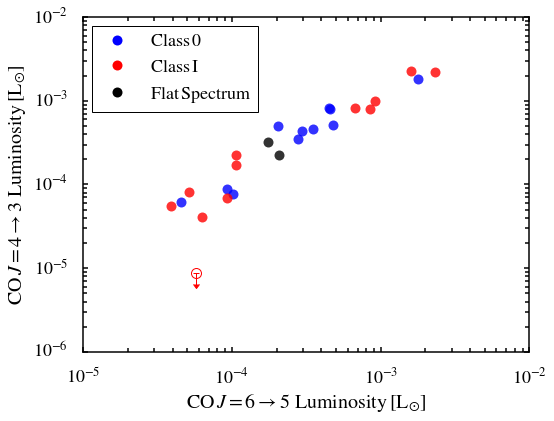

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

mrksize = 10

if len(xind) > 0:
    color_dum = np.array([color_code[obj] for obj in data['Object'][xdetection_mask]])[xind]
    # Class 0
    ax.plot(xdata[xdetection_mask][xind][color_dum == 'b'],
            ydata[ydetection_mask][yind][color_dum == 'b'],
            'o', mec='None', color='b', markersize=mrksize, alpha=0.8)
    # Class I
    ax.plot(xdata[xdetection_mask][xind][color_dum == 'r'],
            ydata[ydetection_mask][yind][color_dum == 'r'],
            'o', mec='None', color='r', markersize=mrksize, alpha=0.8)
    # Class II
    ax.plot(xdata[xdetection_mask][xind][color_dum == 'k'],
            ydata[ydetection_mask][yind][color_dum == 'k'],
            'o', mec='None', color='k', markersize=mrksize, alpha=0.8)

# only upper limit in x
if len(xuplimx) > 0:
    color_dum = np.array([color_code[obj] for obj in data['Object'][xnondetection_mask]])[xuplimx]
    # Class 0
    ax.errorbar(xdata[xnondetection_mask][xuplimx][color_dum == 'b'],
                ydata[ydetection_mask][yuplimx][color_dum == 'b'],
                xerr=xdata[xnondetection_mask][xuplimx][color_dum == 'b']/3, 
                xuplims=True, fmt='o', mfc='None', markeredgewidth=1,
                color='b', mec='b', markersize=mrksize)
    # Class I
    ax.errorbar(xdata[xnondetection_mask][xuplimx][color_dum == 'r'],
                ydata[ydetection_mask][yuplimx][color_dum == 'r'],
                xerr=xdata[xnondetection_mask][xuplimx][color_dum == 'r']/3, 
                xuplims=True, fmt='o', mfc='None', markeredgewidth=1,
                color='r', mec='r', markersize=mrksize)
    # Class II
    ax.errorbar(xdata[xnondetection_mask][xuplimx][color_dum == 'k'],
                ydata[ydetection_mask][yuplimx][color_dum == 'k'],
                xerr=xdata[xnondetection_mask][xuplimx][color_dum == 'k']/3, 
                xuplims=True, fmt='o', mfc='None', markeredgewidth=1,
                color='k', mec='k', markersize=mrksize)

# only upper limit in y
if len(xuplimy) > 0:
    color_dum = np.array([color_code[obj] for obj in data['Object'][xdetection_mask]])[xuplimy]
    # Class 0
    ax.errorbar(xdata[xdetection_mask][xuplimy][color_dum == 'b'],
                ydata[ynondetection_mask][yuplimy][color_dum == 'b'],
                yerr=ydata[ynondetection_mask][yuplimy][color_dum == 'b']/3,
                uplims=True, fmt='o', mfc='None', markeredgewidth=1,
                color='b', mec='b', markersize=mrksize)
    # Class I
    ax.errorbar(xdata[xdetection_mask][xuplimy][color_dum == 'r'],
                ydata[ynondetection_mask][yuplimy][color_dum == 'r'],
                yerr=ydata[ynondetection_mask][yuplimy][color_dum == 'r']/3,
                uplims=True, fmt='o', mfc='None', markeredgewidth=1,
                color='r', mec='r', markersize=mrksize)
    # Class II
    ax.errorbar(xdata[xdetection_mask][xuplimy][color_dum == 'k'],
                ydata[ynondetection_mask][yuplimy][color_dum == 'k'],
                yerr=ydata[ynondetection_mask][yuplimy][color_dum == 'k']/3,
                uplims=True, fmt='o', mfc='None', markeredgewidth=1,
                color='k', mec='k', markersize=mrksize)

# both upper limits
if len(xuplim) > 0:
    color_dum = np.array([color_code[obj] for obj in data['Object'][xnondetection_mask]])[xuplim]
    # Class 0
    ax.errorbar(xdata[xnondetection_mask][xuplim][color_dum == 'b'],
                ydata[ynondetection_mask][yuplim][color_dum == 'b'],
                xerr=xdata[xnondetection_mask][xuplim][color_dum == 'b']/3,
                yerr=ydata[ynondetection_mask][yuplim][color_dum == 'b']/3,
                uplims=True, xuplims=True, fmt='o', mfc='None', markeredgewidth=1, 
                color='b', mec='b', markersize=mrksize)
    # Class I
    ax.errorbar(xdata[xnondetection_mask][xuplim][color_dum == 'r'],
                ydata[ynondetection_mask][yuplim][color_dum == 'r'],
                xerr=xdata[xnondetection_mask][xuplim][color_dum == 'r']/3,
                yerr=ydata[ynondetection_mask][yuplim][color_dum == 'r']/3,
                uplims=True, xuplims=True, fmt='o', mfc='None', markeredgewidth=1, 
                color='r', mec='r', markersize=mrksize)
    # Class II
    ax.errorbar(xdata[xnondetection_mask][xuplim][color_dum == 'k'],
                ydata[ynondetection_mask][yuplim][color_dum == 'k'],
                xerr=xdata[xnondetection_mask][xuplim][color_dum == 'k']/3,
                yerr=ydata[ynondetection_mask][yuplim][color_dum == 'k']/3,
                uplims=True, xuplims=True, fmt='o', mfc='None', markeredgewidth=1, 
                color='k', mec='k', markersize=mrksize)

# legend config
class0, = ax.plot([],[], 'o', color='b', mec='None', markersize=mrksize)
classI, = ax.plot([],[], 'o', color='r', mec='None', markersize=mrksize)
classII, = ax.plot([],[], 'o', color='k', mec='None', markersize=mrksize)
ax.legend([class0, classI, classII], [r'$\rm{Class\,0}$', r'$\rm{Class\,I}$', r'$\rm{Flat\,Spectrum}$'],
          fontsize=18, numpoints=1, loc='best')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(xlabel,fontsize=20)
ax.set_ylabel(ylabel,fontsize=20)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=4)